# Introducing Scikit-Learn

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="figures/PDSH-cover-small.png">
*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) >

Python machine learning 

- [Scikit-Learn](http://scikit-learn.org) provides efficient versions of a large number of common algorithms.
    - a clean, uniform, and streamlined API
    - very useful and complete online documentation.

> ### Once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.


## Python machine learning 

A solid understanding of these API elements will form the foundation for understanding the deeper practical discussion of machine learning algorithms and approaches.

This section provides an overview of the Scikit-Learn API 
- The *data representation* in Scikit-Learn
- The *Estimator* API
- Identifying hand-written digits.

## Data Representation in Scikit-Learn

Machine learning is about ``creating models from data`` :
- How data can be represented in order to be understood by the computer.

### Data as table

A basic table is a two-dimensional grid of data
- Rows represent individual elements of the dataset
- Columns represent quantities related to each of these elements.

For example, consider the [Iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set), famously analyzed by Ronald Fisher in 1936.

We can download this dataset in the form of a Pandas ``DataFrame`` using the [seaborn](http://seaborn.pydata.org/) library:

Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。数据集包含150个数据点，分为3类。可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于（Setosa，Versicolour，Virginica）三个种类中的哪一类。

该数据集包含了5个变量：
- Sepal.Length（花萼长度），单位是cm;
- Sepal.Width（花萼宽度），单位是cm;
- Petal.Length（花瓣长度），单位是cm;
- Petal.Width（花瓣宽度），单位是cm;
- 种类：Iris Setosa（山鸢尾）、Iris Versicolour（杂色鸢尾），以及Iris Virginica（维吉尼亚鸢尾）。

In [20]:
import seaborn as sns
sns.set_context("talk", font_scale=1.5)

iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- Each row of the data refers to a single observed flower
- The number of rows is the total number of flowers in the dataset.
    - the rows of the matrix as *samples*
    - the number of rows as ``n_samples``.
- each column of the data refers to a particular quantitative piece of information that describes each sample.
    - the columns of the matrix as *features*
    - the number of columns as ``n_features``.

#### Features matrix 特征矩阵

This table layout of the information can be thought of as a ``two-dimensional numerical array or matrix``, which we will call the **features matrix**.

- The features matrix is often stored in a variable named ``X``.
- The features matrix is assumed to be two-dimensional, with shape ``[n_samples, n_features]``, 
- The features matrix is most often contained in a NumPy array or a Pandas ``DataFrame``
- some Scikit-Learn models also accept SciPy sparse matrices.

The samples (i.e., rows) always refer to the individual objects described by the dataset.
- The sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner.
- Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array 目标数组、优化目标

In addition to the feature matrix ``X``, we also generally work with a *label* or *target* array, which by convention we will usually call ``y``.
- The target array is usually one dimensional, with length ``n_samples``
- The target array is generally contained in a NumPy array or Pandas ``Series``.
- The target array may have continuous numerical values, or discrete classes/labels.

While some Scikit-Learn estimators do handle multiple target values in the form of a two-dimensional, ``[n_samples, n_targets]`` target array, we will primarily be working with the common case of a one-dimensional target array.

#### Target array

The target array is usually the quantity we want to *predict from the data*: in statistical terms, it is the dependent variable.
> For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the ``species`` column would be considered the target array.

With this target array in mind, we can use Seaborn (see [Visualization With Seaborn](04.14-Visualization-With-Seaborn.ipynb)) to conveniently visualize the data:

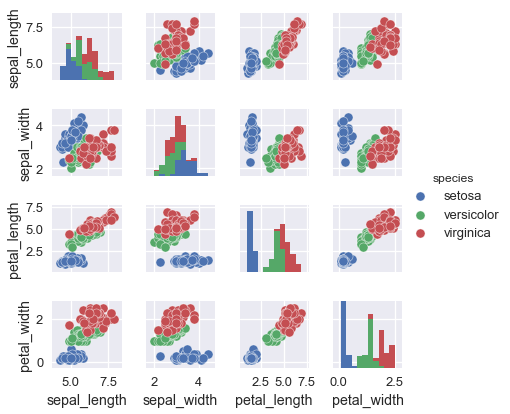

In [21]:
%matplotlib inline
import seaborn as sns; 
sns.set()
sns.set_context("talk", font_scale=1)
sns.pairplot(iris, hue='species', size=1.5);

For use in Scikit-Learn, we will extract the features matrix and target array from the ``DataFrame``
- we can use some of the Pandas ``DataFrame`` operations discussed in the [Chapter 3](03.00-Introduction-to-Pandas.ipynb):

In [4]:
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
X_iris[:3]

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [6]:
y_iris = iris['species']
y_iris.shape

(150,)

In [7]:
y_iris[:3]

0    setosa
1    setosa
2    setosa
Name: species, dtype: object

To summarize, the expected layout of features and target values is visualized in the following diagram:

![](figures/05.02-samples-features.png)
[figure source in Appendix](06.00-Figure-Code.ipynb#Features-and-Labels-Grid)

## Scikit-Learn's Estimator API

With this data properly formatted, we can move on to consider the *estimator* API of Scikit-Learn:

Guiding principles outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Consistency*: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
    - Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which provides a consistent interface for a wide range of machine learning applications.

- *Inspection*: All specified parameter values are exposed as public attributes.

- *Limited object hierarchy*: 
    - Only algorithms are represented by Python classes; 
    - datasets are represented in standard formats (NumPy arrays, Pandas ``DataFrame``s, SciPy sparse matrices) and 
    - parameter names use standard Python strings.


Guiding principles outlined in the [Scikit-Learn API paper](http://arxiv.org/abs/1309.0238):

- *Composition*: Many machine learning tasks can be expressed as sequences of more fundamental algorithms,
  and Scikit-Learn makes use of this wherever possible.

- *Sensible defaults*: When models require user-specified parameters, the library defines an appropriate default value.

> In practice, these principles make Scikit-Learn very easy to use, once the basic principles are understood.



### Basics of the API

Most commonly, the steps in using the Scikit-Learn estimator API are as follows
(we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the ``fit()`` method of the model instance.
5. Apply the Model to new data:
   - For supervised learning, often we predict labels for unknown data using the ``predict()`` method.
   - For unsupervised learning, we often transform or infer properties of the data using the ``transform()`` or ``predict()`` method.

We will now step through several simple examples of applying supervised and unsupervised learning methods.

### Supervised learning example: Simple linear regression

As an example of this process, let's consider a simple linear regression—that is, the common case of fitting a line to $(x, y)$ data.
We will use the following simple data for our regression example:

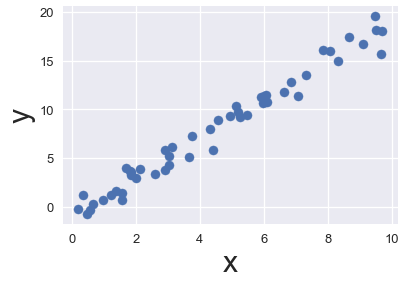

In [22]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)
plt.xlabel('x', fontsize = 30)
plt.ylabel('y', fontsize = 30);

With this data in place, we can use the recipe outlined earlier. Let's walk through the process: 

#### 1. Choose a class of model

In Scikit-Learn, every class of model is represented by a Python class.
- example: a simple linear regression model: 

In [10]:
from sklearn.linear_model import LinearRegression

Note that other more general linear regression models exist as well; you can read more about them in the [``sklearn.linear_model`` module documentation](http://Scikit-Learn.org/stable/modules/linear_model.html).

#### 2. Choose model hyperparameters

Once we have decided on our model class, there are still some options open to us.
Depending on the model class we are working with, we might need to answer one or more questions like the following:

- Would we like to fit for the offset (i.e., *y*-intercept 截距)?
- Would we like the model to be normalized?
- Would we like to preprocess our features to add model flexibility?
- What degree of regularization（正则化） would we like to use in our model?
- How many model components would we like to use?


#### 2. Choose model hyperparameters

These choices are often represented as *hyperparameters*, or parameters that must be set before the model is fit to data.
- In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation .
- the choice of hyperparameters, see [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb).

For our linear regression example, we can 
- instantiate the ``LinearRegression`` class and 
- specify that we would like to fit the intercept using the ``fit_intercept`` hyperparameter:

In [11]:
model = LinearRegression(fit_intercept=True)
model
#help(LinearRegression)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Keep in mind that when the model is instantiated, the only action is the storing of these hyperparameter values.
- In particular, we have not yet applied the model to any data: 
- the Scikit-Learn API makes very clear the distinction between *choice of model* and *application of model to data*.

#### 3. Arrange data into a features matrix and target vector

Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array.

- The target variable ``y`` is already in the correct form (a length-``n_samples`` array)
- The feature matrix ``x`` should be transformed to a matrix of size ``[n_samples, n_features]``.

In this case, this amounts to a simple reshaping of the one-dimensional array:

In [14]:
X = x[:, np.newaxis]
X.shape
X

array([[ 3.74540119],
       [ 9.50714306],
       [ 7.31993942],
       [ 5.98658484],
       [ 1.5601864 ],
       [ 1.5599452 ],
       [ 0.58083612],
       [ 8.66176146],
       [ 6.01115012],
       [ 7.08072578],
       [ 0.20584494],
       [ 9.69909852],
       [ 8.32442641],
       [ 2.12339111],
       [ 1.81824967],
       [ 1.8340451 ],
       [ 3.04242243],
       [ 5.24756432],
       [ 4.31945019],
       [ 2.9122914 ],
       [ 6.11852895],
       [ 1.39493861],
       [ 2.92144649],
       [ 3.66361843],
       [ 4.56069984],
       [ 7.85175961],
       [ 1.99673782],
       [ 5.14234438],
       [ 5.92414569],
       [ 0.46450413],
       [ 6.07544852],
       [ 1.70524124],
       [ 0.65051593],
       [ 9.48885537],
       [ 9.65632033],
       [ 8.08397348],
       [ 3.04613769],
       [ 0.97672114],
       [ 6.84233027],
       [ 4.40152494],
       [ 1.22038235],
       [ 4.9517691 ],
       [ 0.34388521],
       [ 9.09320402],
       [ 2.58779982],
       [ 6

#### 4. Fit the model to your data

Now it is time to apply our model to data.
This can be done with the ``fit()`` method of the model:

In [15]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This ``fit()`` command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.

In Scikit-Learn, by convention all model parameters that were learned during the ``fit()`` process have trailing underscores; 
- for example in this linear model, we have the following:

In [16]:
# The parameters represent the slope of the simple linear fit to the data.
model.coef_

array([ 1.9776566])

In [17]:
# The parameter represent the intercept of the simple linear fit to the data.
model.intercept_

-0.90331072553111635

Comparing to the data definition, we see that they are very close to the input slope of 2 and intercept of -1.

One question that frequently comes up regards the uncertainty in such internal model parameters.

In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves:
- interpreting model parameters is much more a *statistical modeling* question than a *machine learning* question.
- Machine learning rather focuses on what the model *predicts*.

If you would like to dive into the meaning of fit parameters within the model, other tools are available, including the [Statsmodels Python package](http://statsmodels.sourceforge.net/).

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.
In Scikit-Learn, this can be done using the ``predict()`` method.
For the sake of this example, our "new data" will be a grid of *x* values, and we will ask what *y* values the model predicts:

In [18]:
xfit = np.linspace(-1, 11)
xfit

array([ -1.        ,  -0.75510204,  -0.51020408,  -0.26530612,
        -0.02040816,   0.2244898 ,   0.46938776,   0.71428571,
         0.95918367,   1.20408163,   1.44897959,   1.69387755,
         1.93877551,   2.18367347,   2.42857143,   2.67346939,
         2.91836735,   3.16326531,   3.40816327,   3.65306122,
         3.89795918,   4.14285714,   4.3877551 ,   4.63265306,
         4.87755102,   5.12244898,   5.36734694,   5.6122449 ,
         5.85714286,   6.10204082,   6.34693878,   6.59183673,
         6.83673469,   7.08163265,   7.32653061,   7.57142857,
         7.81632653,   8.06122449,   8.30612245,   8.55102041,
         8.79591837,   9.04081633,   9.28571429,   9.53061224,
         9.7755102 ,  10.02040816,  10.26530612,  10.51020408,
        10.75510204,  11.        ])

As before, we need to coerce these *x* values into a ``[n_samples, n_features]`` features matrix, after which we can feed it to the model:

In [21]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit) 

Finally, let's visualize the results by plotting first the raw data, and then this model fit:

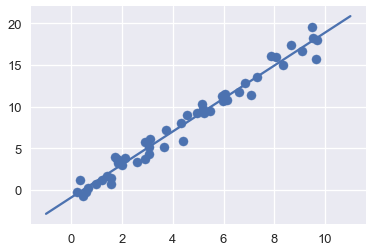

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

Typically the efficacy of the model is evaluated by comparing its results to some known baseline, as we will see in the next example

### Supervised learning example: Iris classification

> ### Question: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

For this task, we will use an extremely simple generative model known as **Gaussian naive Bayes** 
- which proceeds by assuming each class is drawn from an axis-aligned Gaussian distribution
- see [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb) for more details).
- it is so fast 
- it has no hyperparameters to choose

Gaussian naive Bayes is often a good model to use as a baseline classification, before exploring whether improvements can be found through more sophisticated models.

# To evaluate the model on data it has not seen before

- we will split the data into a *training set* and a *testing set*.
    - Using the ``train_test_split`` utility function:

In [24]:
from sklearn.cross_validation import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

With the data arranged, we can follow our recipe to predict the labels:

In [25]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

Finally, we can use the ``accuracy_score`` utility to see the fraction of predicted labels that match their true value:

In [27]:
print(*zip(ytest, y_model))

('setosa', 'setosa') ('versicolor', 'versicolor') ('versicolor', 'versicolor') ('setosa', 'setosa') ('virginica', 'virginica') ('versicolor', 'versicolor') ('virginica', 'virginica') ('setosa', 'setosa') ('setosa', 'setosa') ('virginica', 'virginica') ('versicolor', 'versicolor') ('setosa', 'setosa') ('virginica', 'virginica') ('versicolor', 'versicolor') ('versicolor', 'versicolor') ('setosa', 'setosa') ('versicolor', 'versicolor') ('versicolor', 'versicolor') ('setosa', 'setosa') ('setosa', 'setosa') ('versicolor', 'versicolor') ('versicolor', 'versicolor') ('versicolor', 'virginica') ('setosa', 'setosa') ('virginica', 'virginica') ('versicolor', 'versicolor') ('setosa', 'setosa') ('setosa', 'setosa') ('versicolor', 'versicolor') ('virginica', 'virginica') ('versicolor', 'versicolor') ('virginica', 'virginica') ('versicolor', 'versicolor') ('virginica', 'virginica') ('virginica', 'virginica') ('setosa', 'setosa') ('versicolor', 'versicolor') ('setosa', 'setosa')


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.97368421052631582

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality reduction

Reducing the dimensionality of the Iris data to more easily visualize it:
- Iris data is four dimensional: 
    - there are four features recorded for each sample.

The task of dimensionality reduction is to ask:

> ## whether there is a suitable lower-dimensional representation that retains the essential features of the data.

### Unsupervised learning example: Iris dimensionality reduction

Dimensionality reduction is often used as an aid to visualizing data: 
- it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use ``principal component analysis`` (PCA; see [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb))
- It is a fast linear dimensionality reduction technique.

We will ask the model to return 
- two components
    - a two-dimensional representation of the data.
# Following the sequence of steps outlined earlier:

In [15]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

To plot the results:
- A quick way to do this is to insert the results into the original Iris ``DataFrame``, 
- use Seaborn's ``lmplot`` to show the results:

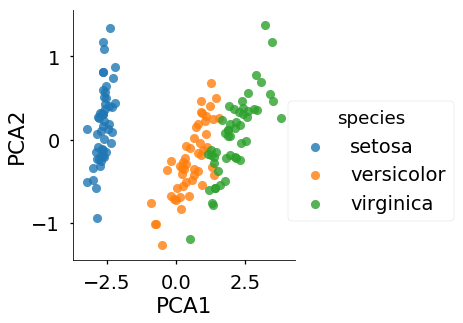

In [16]:
sns.set_context("talk", font_scale=1.5)
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

In the two-dimensional representation, the species are fairly well separated, even though the PCA algorithm had no knowledge of the species labels!

A relatively straightforward classification will probably be effective on the dataset.

### Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data.

> ### A clustering algorithm attempts to find distinct groups of data without reference to any labels.

We will use a powerful clustering method called a ``Gaussian mixture model (GMM)``
- more detail in [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb).
- A GMM attempts to model the data as a collection of Gaussian blobs.

We can fit the Gaussian mixture model as follows:

In [8]:
from sklearn.mixture import GaussianMixture      # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')  # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                    # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)        # 4. Determine cluster labels

As before, we will 
- add the cluster label to the Iris ``DataFrame`` and 
- use Seaborn to plot the results:

In [9]:
sns.plotting_context()

{'axes.labelsize': 21.450000000000003,
 'axes.titlesize': 23.400000000000002,
 'font.size': 10.0,
 'grid.linewidth': 1.3,
 'legend.fontsize': 19.5,
 'lines.linewidth': 2.275,
 'lines.markeredgewidth': 0.0,
 'lines.markersize': 9.1,
 'patch.linewidth': 0.39,
 'xtick.labelsize': 19.5,
 'xtick.major.pad': 9.1,
 'xtick.major.width': 1.3,
 'xtick.minor.width': 0.65,
 'ytick.labelsize': 19.5,
 'ytick.major.pad': 9.1,
 'ytick.major.width': 1.3,
 'ytick.minor.width': 0.65}

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster,PCA1,PCA2
0,5.1,3.5,1.4,0.2,setosa,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,setosa,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,setosa,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,setosa,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,setosa,1,-2.728717,0.326755


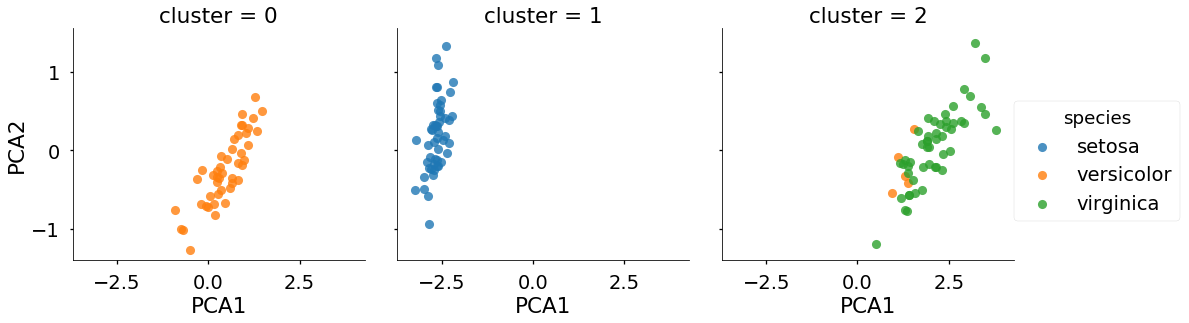

In [18]:
sns.set_context("talk", font_scale=1.5)
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, GMM algorithm recovered the underlying label  without an expert: 
- the measurements of these flowers are distinct enough
- we could *automatically* identify the presence of these different groups of species 
    - with a simple clustering algorithm!
- might further give experts in the field clues as to the relationship between the samples they are observing.

## Application: Exploring Hand-written Digits

In the wild, this problem involves 
- locating characters in an image. 
- identifying characters in an image. 

Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.

### Loading and visualizing the digits data

We'll use Scikit-Learn's data access interface and take a look at this data:

In [35]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 
- 1,797 samples 
- each consisting of an 8 × 8 grid of pixels.

Let's visualize the first hundred of these:

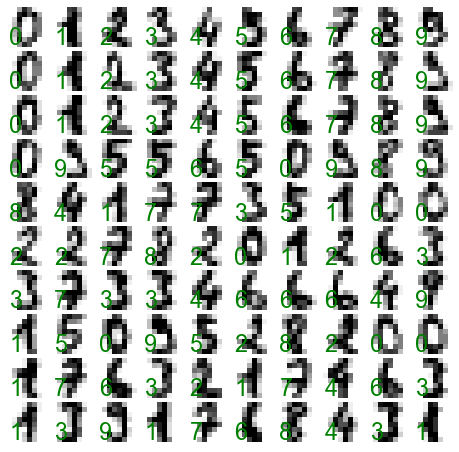

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In order to work with this data within Scikit-Learn, 
- we need a two-dimensional, ``[n_samples, n_features]`` representation.
- treating each pixel in the image as a feature: 
    - so that we have a length-64 array of pixel values representing each digit.
- target array gives the previously determined label for each digit.

Features and targets are represented as the ``data`` and ``target`` attributes in the `digits` dataset respectively:

In [37]:
X = digits.data
X.shape

(1797, 64)

In [38]:
X

array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]])

In [39]:
y = digits.target
y.shape

(1797,)

In [40]:
y

array([0, 1, 2, ..., 8, 9, 8])

We see here that there are 1,797 samples and 64 features.

### Unsupervised learning: Dimensionality reduction

We'd like to visualize our points within the 64-dimensional parameter space
- it's difficult to effectively visualize points in such a high-dimensional space.
- Instead we'll reduce the dimensions to 2, using an unsupervised method.

Here, we'll make use of a manifold learning algorithm called *Isomap* (see [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)), and transform the data to two dimensions:

In [41]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

We see that the projected data is now two-dimensional.
Let's plot this data to see if we can learn anything from its structure:

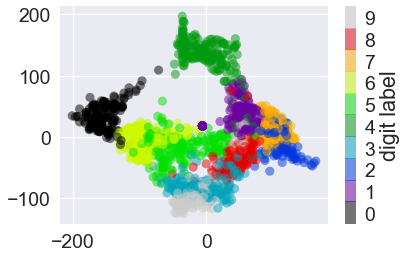

In [42]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

This plot gives us some good intuition into how well various numbers are separated in the larger 64-dimensional space. 

- zeros (in black) and ones (in purple) have very little overlap in parameter space.
    - Intuitively, this makes sense: a zero is empty in the middle of the image, while a one will generally have ink in the middle.
- There seems to be a more or less continuous spectrum between ones and fours: 
    - we can understand this by realizing that some people draw ones with "hats" on them, which cause them to look similar to fours.

Overall, however, the different groups appear to be fairly well separated in the parameter space: 
- this tells us that even a very straightforward supervised classification algorithm should perform suitably on this data.

Let's give it a try.

### Classification on digits

Let's apply a classification algorithm to the digits.

- split the data into a training and testing set
- fit a Gaussian naive Bayes model

In [43]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have predicted our model, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.83333333333333337

With even this extremely simple model, we find about 80% accuracy for classification of the digits!

However, this single number doesn't tell us *where* we've gone wrong
- one nice way to do this is to use the *confusion matrix*, 
    - which we can compute with Scikit-Learn and plot with Seaborn:

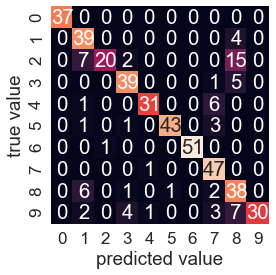

In [123]:
from sklearn.metrics import confusion_matrix
sns.set_context("notebook", font_scale=1.7)

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

This shows us where the mis-labeled points tend to be: 
- a large number of twos here are mis-classified as either ones or eights.

Another way to gain intuition into the characteristics of the model:
- to plot the inputs again, with their predicted labels.
- using green for correct labels, and red for incorrect labels:

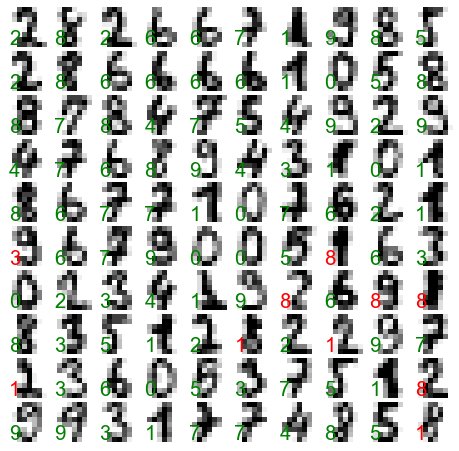

In [124]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

Examining this subset of the data, we can gain insight regarding where the algorithm might be not performing optimally.

To go beyond our 80% classification rate, we might move to a more sophisticated algorithm such as 
- support vector machines (see [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)), 
- random forests (see [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)) 
- the other classification approaches.

## Summary

In this section we have covered the essential features of the Scikit-Learn 
- data representation
- the estimator API.

Regardless of the type of estimator, the same import/instantiate/fit/predict pattern holds.

Armed with this information about the estimator API, you can explore the Scikit-Learn documentation and begin trying out various models on your data.

In the next section, we will explore perhaps the most important topic in machine learning: how to select and validate your model.

<!--NAVIGATION-->
< [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb) | [Contents](Index.ipynb) | [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb) >